In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
time_range = pd.date_range('1/1/2018', periods=1096)
fruits = ['苹果', '西瓜', '橙子', '葡萄', '车厘子', '菠萝', '荔枝', '火龙果']
fruit_list = np.random.choice(fruits, size=len(time_range), replace=True)

In [11]:
names = ['张伟', '王芳', '李静', '王秀英', '李强', '李丽', '刘勇']
name_list = np.random.choice(names, size=len(time_range), replace=True)

In [12]:
print(time_range)
print(fruit_list)
print(name_list)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', length=1096, freq='D')
['荔枝' '西瓜' '火龙果' ... '火龙果' '火龙果' '西瓜']
['王秀英' '张伟' '李强' ... '李静' '张伟' '张伟']


In [16]:
order = pd.DataFrame({
    'time': time_range,
    'fruit': fruit_list,
    'name': name_list,
    'weight': np.random.choice(list(range(40, 100)), size=len(time_range), replace=True)
})
print(order)

           time fruit name  weight
0    2018-01-01    荔枝  王秀英      78
1    2018-01-02    西瓜   张伟      44
2    2018-01-03   火龙果   李强      95
3    2018-01-04    苹果  王秀英      74
4    2018-01-05    橙子   王芳      50
...         ...   ...  ...     ...
1091 2020-12-27    橙子   李强      76
1092 2020-12-28    荔枝   李丽      89
1093 2020-12-29   火龙果   李静      78
1094 2020-12-30   火龙果   张伟      75
1095 2020-12-31    西瓜   张伟      90

[1096 rows x 4 columns]


In [17]:
information = pd.DataFrame({
    'fruit': fruits,
    'price': [5.8, 5, 8.8, 12, 25.2, 9.9, 15.8, 7],
    'region': ['华南', '东北', '西北', '华中', '西北', '华南', '华北', '华中']
})
print(information)

  fruit  price region
0    苹果    5.8     华南
1    西瓜    5.0     东北
2    橙子    8.8     西北
3    葡萄   12.0     华中
4   车厘子   25.2     西北
5    菠萝    9.9     华南
6    荔枝   15.8     华北
7   火龙果    7.0     华中


In [21]:
df = pd.merge(order, information, how='outer').sort_values('time').reset_index(drop=True)
df['amount'] = df['weight'] * df['price']

In [80]:
print(df)
df.to_csv('test.csv')

           time fruit name  weight  price region  amount  year  month  \
0    2018-01-01    荔枝  王秀英      78   15.8     华北  1232.4  2018      1   
1    2018-01-02    西瓜   张伟      44    5.0     东北   220.0  2018      1   
2    2018-01-03   火龙果   李强      95    7.0     华中   665.0  2018      1   
3    2018-01-04    苹果  王秀英      74    5.8     华南   429.2  2018      1   
4    2018-01-05    橙子   王芳      50    8.8     西北   440.0  2018      1   
...         ...   ...  ...     ...    ...    ...     ...   ...    ...   
1091 2020-12-27    橙子   李强      76    8.8     西北   668.8  2020     12   
1092 2020-12-28    荔枝   李丽      89   15.8     华北  1406.2  2020     12   
1093 2020-12-29   火龙果   李静      78    7.0     华中   546.0  2020     12   
1094 2020-12-30   火龙果   张伟      75    7.0     华中   525.0  2020     12   
1095 2020-12-31    西瓜   张伟      90    5.0     东北   450.0  2020     12   

     year_month  
0        201801  
1        201801  
2        201801  
3        201801  
4        201801  
...         ...

In [86]:
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['year_month'] = df['time'].dt.strftime('%Y%m')

In [87]:
xx = df.groupby('year_month')['amount'].sum()
xx.index

Index(['201801', '201802', '201803', '201804', '201805', '201806', '201807',
       '201808', '201809', '201810', '201811', '201812', '201901', '201902',
       '201903', '201904', '201905', '201906', '201907', '201908', '201909',
       '201910', '201911', '201912', '202001', '202002', '202003', '202004',
       '202005', '202006', '202007', '202008', '202009', '202010', '202011',
       '202012'],
      dtype='object', name='year_month')

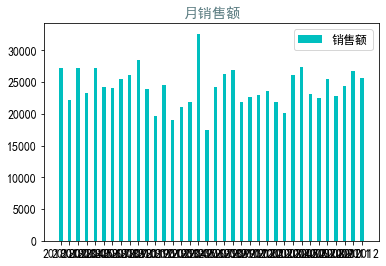

In [88]:
fig, axe = plt.subplots()
#==============================================
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签，黑体的 name 为 SimHei
plt.rcParams['font.size'] = 12  # 设置字体大小
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号，跟是否显示中文没关系，你可以考虑加或不加
#==============================================
index = np.arange(10)
# print(index)
width = 0.4
axe.bar(xx.index, xx, width, color='c', align='center', label='销售额')
# axe.bar(df['year_month'] , tuple(l3), width, color='b', align='edge', label='总数')
# axe.set_xticks(index + width)
# axe.set_xticklabels(tuple(l1))
axe.legend()
# 设置标题
plt.title('月销售额', color='#5D7E83')
plt.show()

In [161]:
year_fruit = df.groupby(['year', 'fruit'])['amount'].sum()
# type(year_fruit.index)
print(year_fruit)
# # 水果种类
listNames = []
for i in year_fruit[2018].index:
    listNames.append(i)
listNames
# print(df.groupby(['year'])['amount'].sum())



year  fruit
2018  橙子        30932.0
      火龙果       19432.0
      苹果        21251.2
      荔枝        57796.4
      菠萝        18849.6
      葡萄        31140.0
      西瓜        15850.0
      车厘子      103622.4
2019  橙子        22387.2
      火龙果       27356.0
      苹果        16019.6
      荔枝        40053.0
      菠萝        31353.3
      葡萄        53880.0
      西瓜        12290.0
      车厘子       77918.4
2020  橙子        37963.2
      火龙果       21686.0
      苹果        20862.6
      荔枝        44429.6
      菠萝        31165.2
      葡萄        30168.0
      西瓜        12630.0
      车厘子       90468.0
Name: amount, dtype: float64
[30932.000000000004, 19432.0, 21251.200000000008, 57796.399999999994, 18849.599999999995, 31140.0, 15850.0, 103622.4, 22387.199999999993, 27356.0, 16019.599999999999, 40053.0, 31353.30000000001, 53880.0, 12290.0, 77918.4, 37963.200000000004, 21686.0, 20862.6, 44429.6, 31165.200000000008, 30168.0, 12630.0, 90467.99999999999]


In [154]:
#计算总共总数
sum_count = 298873.6
for i in year_fruit:
    sum_count += i
print(sum_count)
#统计比例
Proportions = []
for i in year_fruit:
    Proportions.insert(len(Proportions), i / sum_count)
print(Proportions)

TypeError: unsupported operand type(s) for +=: 'float' and 'str'

In [ ]:
#构造饼图
fig, axe = plt.subplots()
labels = listNames
# explode = (0, 0, 0, 0)
colors = ['tomato', 'lightskyblue', 'goldenrod', '#5D7E83']
axe.pie(Proportions, colors=colors, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
axe.axis('equal')
axe.set_title('2018饼图', color='#5D7E83')
plt.show()

In [156]:
aver = [col for col in df.columns if col  in['amount']]
df_mean = df.groupby(df["year"])[aver].mean()
print(df_mean)


          amount
year            
2018  818.831781
2019  770.568493
2020  790.635519
